### <center> OpenCV epipolar lines and epipoles computation with Lucas-Kanade (1st of mya hackathon) </center>

Pyramidal Lucas-Kanade algorithm let you track certain type of points in a sequence of frames (video). One can decide the points using **`cv2.goodFeaturesToTrack()`**, or try with other kind of points which makes it not always with good performance.  

We take the first frame, detect some Shi-Tomasi corner points in it, then iteratively track those points using Lucas-Kanade optical flow using the function.

For the function **`cv2.calcOpticalFlowPyrLK()`** we pass the previous frame, previous points and next frame. It returns next points along with some statues numbers which has a value of 1 if next point is found, else zero. We iteratively pass these next points as previous points in next step.

In [9]:
# Import the libraries to use
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import time
%matplotlib inline

First of all we need to lower the resolution of the images from 4080×2720 to 1024×683.

In [2]:
from PIL import Image

Generate low resolution images of the church data set

In [3]:
size = 1024, 683
# The paths for reading and writing the images
path_raw = '/Users/hector/Documents/Master_thesis/EPI_samples/Church_data_set/church_image-raw/church_image-raw/'
path_lowres = '/Users/hector/Documents/Master_thesis/EPI_samples/Church_data_set/church_image-raw/church_image_lowres/'

In [4]:
#for loop to lower the resolution
for i in range(0,101):
    if i < 10:
        # open the row high-resolution image
        im = Image.open(path_raw+'church_image-raw_000'+str(i)+'.jpg')
        # resize the image
        im_resized = im.resize(size, Image.ANTIALIAS)
        # save the image
        im_resized.save(path_lowres+'church_image-raw_000'+str(i)+'_lowres.jpg')
    else:
        if i < 100:
            # open the row high-resolution image
            im = Image.open(path_raw+'church_image-raw_00'+str(i)+'.jpg')
            # resize the image
            im_resized = im.resize(size, Image.ANTIALIAS)
            # save the image
            im_resized.save(path_lowres+'church_image-raw_00'+str(i)+'_lowres.jpg')
        else:
            # open the row high-resolution image
            im = Image.open(path_raw+'church_image-raw_0100.jpg')
            # resize the image
            im_resized = im.resize(size, Image.ANTIALIAS)
            # save the image
            im_resized.save(path_lowres+'church_image-raw_0100_lowres.jpg')

Generate low resolution images of the couch data set

In [4]:
size = 1024, 683
# The paths for reading and writing the images
path_raw = '/Users/hector/Documents/Master_thesis/EPI_samples/Couch_data_set/couch_image-raw/couch_image-raw/'
path_lowres = '/Users/hector/Documents/Master_thesis/EPI_samples/Couch_data_set/couch_image-raw/couch_image-raw_lowres/'

In [5]:
#for loop to lower the resolution
for i in range(0,101):
    if i < 10:
        # open the row high-resolution image
        im = Image.open(path_raw+'couch_image-raw_000'+str(i)+'.jpg')
        # resize the image
        im_resized = im.resize(size, Image.ANTIALIAS)
        # save the image
        im_resized.save(path_lowres+'couch_image-raw_000'+str(i)+'_lowres.jpg')
    else:
        if i < 100:
            # open the row high-resolution image
            im = Image.open(path_raw+'couch_image-raw_00'+str(i)+'.jpg')
            # resize the image
            im_resized = im.resize(size, Image.ANTIALIAS)
            # save the image
            im_resized.save(path_lowres+'couch_image-raw_00'+str(i)+'_lowres.jpg')
        else:
            # open the row high-resolution image
            im = Image.open(path_raw+'couch_image-raw_0100.jpg')
            # resize the image
            im_resized = im.resize(size, Image.ANTIALIAS)
            # save the image
            im_resized.save(path_lowres+'couch_image-raw_0100_lowres.jpg')

Now lets start the feature tracking 

In [5]:
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 400,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (18,18),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))

In [6]:
# Path of church data set
path_lowres = '/Users/hector/Documents/Master_thesis/EPI_samples/Church_data_set/church_image-raw/church_image_lowres/'

In [7]:
# Take first frame image and find corners in church data set
old_frame = cv2.imread(path_lowres+'church_image-raw_0000'+'_lowres.jpg',1)
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
st = np.array([[1]]*len(p0))
# Create a data frame with the entries of the point
# df = pd.DataFrame({'p' : range(1,len(p0)+1), 'x1' : p0[st==1][:,0], 'y1' : p0[st==1][:,1]})
df_church = pd.DataFrame({'x1' : p0[st==1][:,0], 'y1' : p0[st==1][:,1]})
# Vector to track the number of points to track 
lengths_church = [len(p0)]
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

In [10]:
t = time.time()
# For loop to track those points
for i in range(0,100):
    if i < 10: 
        frame = cv2.imread(path_lowres+'church_image-raw_000'+str(i)+'_lowres.jpg')
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # calculate optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
        # Select good points
        good_new = p1[st==1]
        good_old = p0[st==1]
        # append new length to lengths
        lengths_church.append(len(p1))
        
        # Adding the new points to the dataframe
        df_church_new = pd.DataFrame({'x'+str(i+2) : [np.nan]*len(df_church.x1), 'y'+str(i+2) : [np.nan]*len(df_church.x1)})
        notnull = ~pd.isnull(df_church['x'+str(i+1)])
        df_church_new1 = df_church_new[notnull]
        id=df_church_new1[[sti[0]==1 for sti in st]].index
        df_church_new1['x'+str(i+2)][[sti[0]==1 for sti in st]] = pd.Series(p1[st==1][:,0],index = id)
        df_church_new1['y'+str(i+2)][[sti[0]==1 for sti in st]] = pd.Series(p1[st==1][:,1],index = id)
        df_church_new[notnull] = df_church_new1
        df_church=df_church.join(df_church_new)
        
        # draw the tracks
        for j,(new,old) in enumerate(zip(good_new,good_old)):
            a,b = new.ravel()
            c,d = old.ravel()
            mask = cv2.line(mask, (a,b),(c,d), color[j%100].tolist(), 2)
            frame = cv2.circle(frame,(a,b),5,color[j%100].tolist(),-1)
        img = cv2.add(frame,mask)
        #cv2.imshow('frame',img)

        # Now update the previous frame and previous points
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1,1,2)
    else:
        if i < 100:
            frame = cv2.imread(path_lowres+'church_image-raw_00'+str(i)+'_lowres.jpg')
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # calculate optical flow
            p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
            # Select good points
            good_new = p1[st==1]
            good_old = p0[st==1]
            # append new length to lengths
            lengths_church.append(len(p1))
            
            # Adding the new points to the dataframe
            df_church_new = pd.DataFrame({'x'+str(i+2) : [np.nan]*len(df_church.x1), 'y'+str(i+2) : [np.nan]*len(df_church.x1)})
            notnull = ~pd.isnull(df_church['x'+str(i+1)])
            df_church_new1 = df_church_new[notnull]
            id=df_church_new1[[sti[0]==1 for sti in st]].index
            df_church_new1['x'+str(i+2)][[sti[0]==1 for sti in st]] = pd.Series(p1[st==1][:,0],index = id)
            df_church_new1['y'+str(i+2)][[sti[0]==1 for sti in st]] = pd.Series(p1[st==1][:,1],index = id)
            df_church_new[notnull] = df_church_new1
            df_church=df_church.join(df_church_new)
        
            # draw the tracks
            for j,(new,old) in enumerate(zip(good_new,good_old)):
                a,b = new.ravel()
                c,d = old.ravel()
                mask = cv2.line(mask, (a,b),(c,d), color[j%100].tolist(), 2)
                frame = cv2.circle(frame,(a,b),5,color[j%100].tolist(),-1)
            img = cv2.add(frame,mask)
            #cv2.imshow('frame',img)

            # Now update the previous frame and previous points
            old_gray = frame_gray.copy()
            p0 = good_new.reshape(-1,1,2)
        else:
            frame = cv2.imread(path_lowres+'church_image-raw_0100_lowres.jpg')
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # calculate optical flow
            p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
            # Select good points
            good_new = p1[st==1]
            good_old = p0[st==1]
            # append new length to lengths
            lengths_church.append(len(p1))
            
            # Adding the new points to the dataframe
            df_church_new = pd.DataFrame({'x'+str(i+2) : [np.nan]*len(df_church.x1), 'y'+str(i+2) : [np.nan]*len(df_church.x1)})
            notnull = ~pd.isnull(df_church['x'+str(i+1)])
            df_church_new1 = df_church_new[notnull]
            id=df_church_new1[[sti[0]==1 for sti in st]].index
            df_church_new1['x'+str(i+2)][[sti[0]==1 for sti in st]] = pd.Series(p1[st==1][:,0],index = id)
            df_church_new1['y'+str(i+2)][[sti[0]==1 for sti in st]] = pd.Series(p1[st==1][:,1],index = id)
            df_church_new[notnull] = df_church_new1
            df_church=df_church.join(df_church_new)
            
            # draw the tracks
            for j,(new,old) in enumerate(zip(good_new,good_old)):
                a,b = new.ravel()
                c,d = old.ravel()
                mask = cv2.line(mask, (a,b),(c,d), color[j%100].tolist(), 2)
                frame = cv2.circle(frame,(a,b),5,color[j%100].tolist(),-1)
            img = cv2.add(frame,mask)
            img = cv2.add(frame,mask)
            #cv2.imshow('frame',img)

            # Now update the previous frame and previous points
            old_gray = frame_gray.copy()
            p0 = good_new.reshape(-1,1,2)

elapsed = time.time() - t
cv2.destroyAllWindows()

/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
elapsed

16.362263917922974

In [88]:
df_church.to_csv('church_tracking.csv')

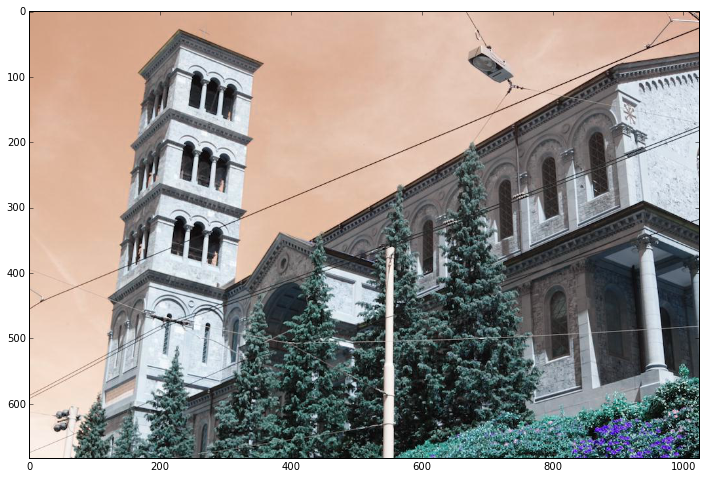

In [15]:
i = 0
frame = cv2.imread(path_lowres+'church_image-raw_000'+str(i)+'_lowres.jpg')
plt.rcParams["figure.figsize"] = [12,9]
plt.imshow(frame,cmap='gray')
plt.show()

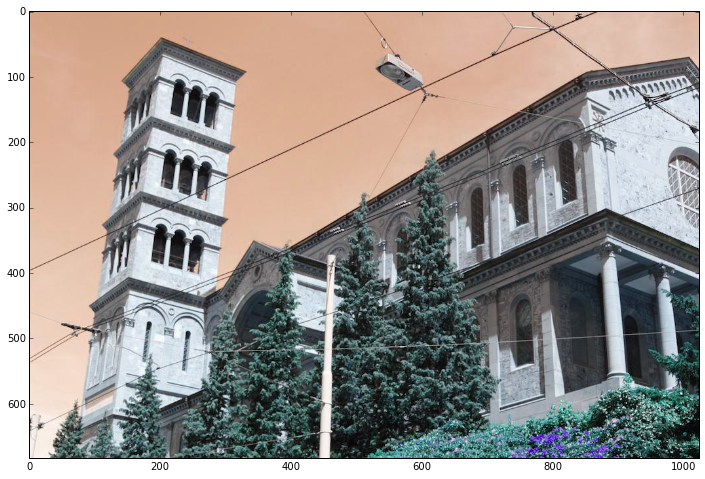

In [19]:
i = 100
frame = cv2.imread(path_lowres+'church_image-raw_0'+str(i)+'_lowres.jpg')
plt.rcParams["figure.figsize"] = [12,9]
plt.imshow(frame,cmap='gray')
plt.show()

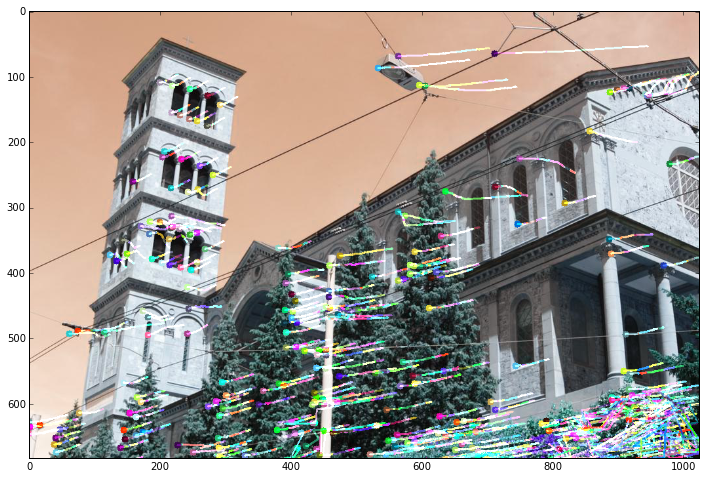

In [12]:
plt.rcParams["figure.figsize"] = [12,9]
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
plt.

In [11]:
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))

In [10]:
# Path of couch data set
path_lowres = '/Users/hector/Documents/Master_thesis/EPI_samples/Couch_data_set/couch_image-raw/couch_image-raw_lowres/'

In [11]:
# Take first frame image and find corners in church data set
old_frame = cv2.imread(path_lowres+'couch_image-raw_0000'+'_lowres.jpg',1)
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
st = np.array([[1]]*len(p0))
# Create a data frame with the entries of the point
# df = pd.DataFrame({'p' : range(1,len(p0)+1), 'x1' : p0[st==1][:,0], 'y1' : p0[st==1][:,1]})
df_couch = pd.DataFrame({'x1' : p0[st==1][:,0], 'y1' : p0[st==1][:,1]})
# Vector to track the number of points to track 
lengths_couch = [len(p0)]
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

In [12]:
# For loop to track those points
for i in range(0,100):
    if i < 10: 
        frame = cv2.imread(path_lowres+'couch_image-raw_000'+str(i)+'_lowres.jpg')
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # calculate optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
        # Select good points
        good_new = p1[st==1]
        good_old = p0[st==1]
        # append new length to lengths
        lengths_couch.append(len(p1))
        
        # Adding the new points to the dataframe
        # Adding the new points to the dataframe
        df_couch_new = pd.DataFrame({'x'+str(i+2) : [np.nan]*len(df_couch.x1), 'y'+str(i+2) : [np.nan]*len(df_couch.x1)})
        notnull = ~pd.isnull(df_couch['x'+str(i+1)])
        df_couch_new1 = df_couch_new[notnull]
        id=df_couch_new1[[sti[0]==1 for sti in st]].index
        df_couch_new1['x'+str(i+2)][[sti[0]==1 for sti in st]] = pd.Series(p1[st==1][:,0],index = id)
        df_couch_new1['y'+str(i+2)][[sti[0]==1 for sti in st]] = pd.Series(p1[st==1][:,1],index = id)
        df_couch_new[notnull] = df_couch_new1
        df_couch=df_couch.join(df_couch_new)
        
        # draw the tracks
        for j,(new,old) in enumerate(zip(good_new,good_old)):
            a,b = new.ravel()
            c,d = old.ravel()
            mask = cv2.line(mask, (a,b),(c,d), color[j].tolist(), 2)
            frame = cv2.circle(frame,(a,b),5,color[j].tolist(),-1)
        img = cv2.add(frame,mask)
        #cv2.imshow('frame',img)

        # Now update the previous frame and previous points
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1,1,2)
    else:
        if i < 100:
            frame = cv2.imread(path_lowres+'couch_image-raw_00'+str(i)+'_lowres.jpg')
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # calculate optical flow
            p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
            # Select good points
            good_new = p1[st==1]
            good_old = p0[st==1]
            # append new length to lengths
            lengths_couch.append(len(p1))
            
            # Adding the new points to the dataframe
            df_couch_new = pd.DataFrame({'x'+str(i+2) : [np.nan]*len(df_couch.x1), 'y'+str(i+2) : [np.nan]*len(df_couch.x1)})
            notnull = ~pd.isnull(df_couch['x'+str(i+1)])
            df_couch_new1 = df_couch_new[notnull]
            id=df_couch_new1[[sti[0]==1 for sti in st]].index
            df_couch_new1['x'+str(i+2)][[sti[0]==1 for sti in st]] = pd.Series(p1[st==1][:,0],index = id)
            df_couch_new1['y'+str(i+2)][[sti[0]==1 for sti in st]] = pd.Series(p1[st==1][:,1],index = id)
            df_couch_new[notnull] = df_couch_new1
            df_couch=df_couch.join(df_couch_new)
            
            # draw the tracks
            for j,(new,old) in enumerate(zip(good_new,good_old)):
                a,b = new.ravel()
                c,d = old.ravel()
                mask = cv2.line(mask, (a,b),(c,d), color[j].tolist(), 2)
                frame = cv2.circle(frame,(a,b),5,color[j].tolist(),-1)
            img = cv2.add(frame,mask)
            #cv2.imshow('frame',img)

            # Now update the previous frame and previous points
            old_gray = frame_gray.copy()
            p0 = good_new.reshape(-1,1,2)
        else:
            frame = cv2.imread(path_lowres+'couch_image-raw_0100_lowres.jpg')
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # calculate optical flow
            p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
            # Select good points
            good_new = p1[st==1]
            good_old = p0[st==1]
            # append new length to lengths
            lengths_couch.append(len(p1))
            
            # Adding the new points to the dataframe
            df_couch_new = pd.DataFrame({'x'+str(i+2) : [np.nan]*len(df_couch.x1), 'y'+str(i+2) : [np.nan]*len(df_couch.x1)})
            notnull = ~pd.isnull(df_couch['x'+str(i+1)])
            df_couch_new1 = df_couch_new[notnull]
            id=df_couch_new1[[sti[0]==1 for sti in st]].index
            df_couch_new1['x'+str(i+2)][[sti[0]==1 for sti in st]] = pd.Series(p1[st==1][:,0],index = id)
            df_couch_new1['y'+str(i+2)][[sti[0]==1 for sti in st]] = pd.Series(p1[st==1][:,1],index = id)
            df_couch_new[notnull] = df_couch_new1
            df_couch=df_couch.join(df_couch_new)
            
            # draw the tracks
            for i,(new,old) in enumerate(zip(good_new,good_old)):
                a,b = new.ravel()
                c,d = old.ravel()
                mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
                frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
            img = cv2.add(frame,mask)
            img = cv2.add(frame,mask)
            #cv2.imshow('frame',img)

            # Now update the previous frame and previous points
            old_gray = frame_gray.copy()
            p0 = good_new.reshape(-1,1,2)
            
cv2.destroyAllWindows()

In [13]:
df_couch.to_csv('couch_tracking.csv')

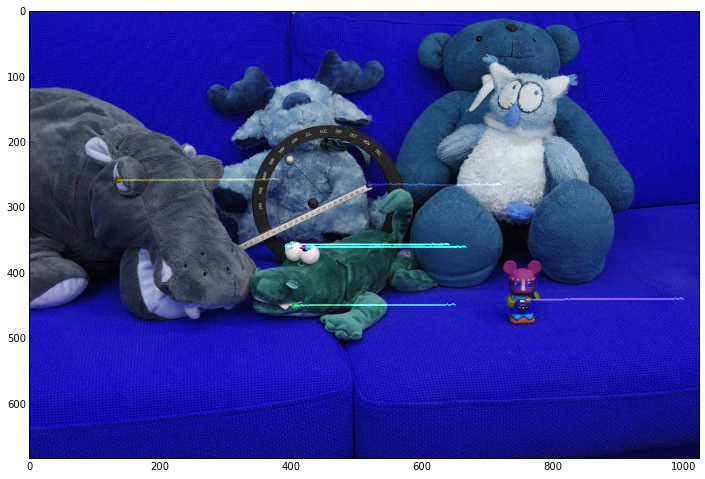

In [14]:
plt.rcParams["figure.figsize"] = [12,9]
plt.imshow(img,cmap='gray')
plt.show()

To continue with the pipeline we need to storage the points in the best format possible. 

One can see that the points follow a relative straight line path.

Lets save the points path in a data frame so one can paint the correspondent EPI-polar plane with Julia. 